In [1]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np

from society.agent import Agent, TrainableAgent
from society.simulations import OnlineLearningSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.gameplay.tft import TitForTat
from society.strategies.selection.greedy import (
    EGreedySelectionStrategy,
    GreedySelectionStrategy,
)
from society.strategies.selection.qlearning import QLearningSelectionStrategy
from society.strategies.selection.random import RandomSelectionStrategy
from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (10, 6)

c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\numeric.py:1211: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


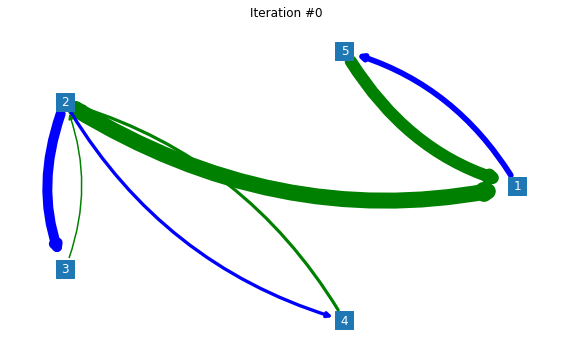

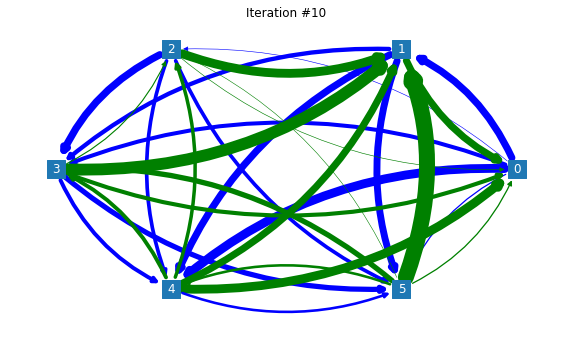

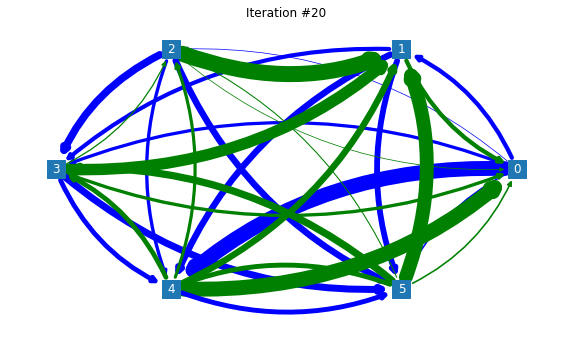

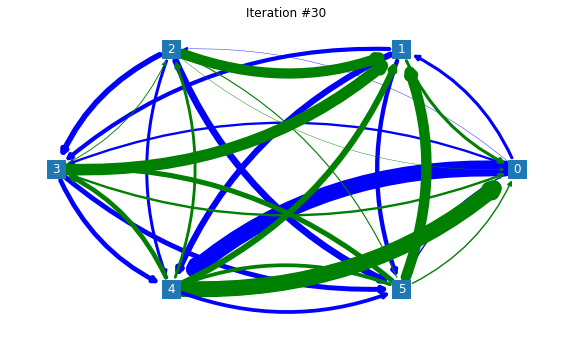

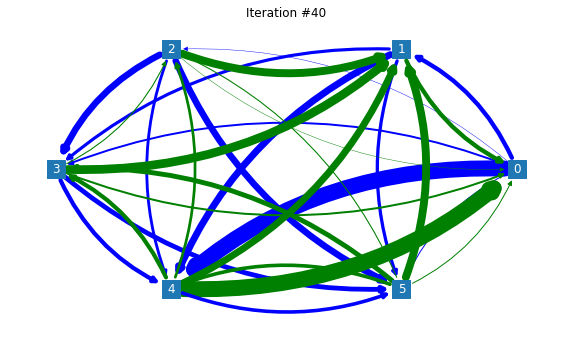

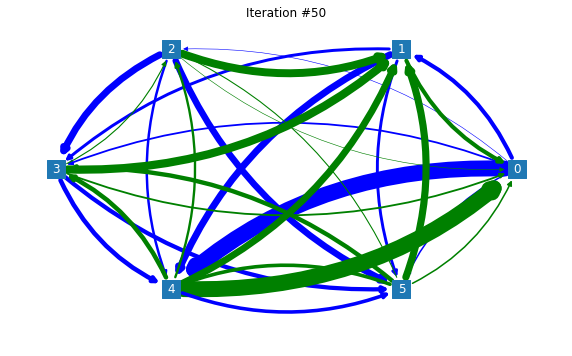

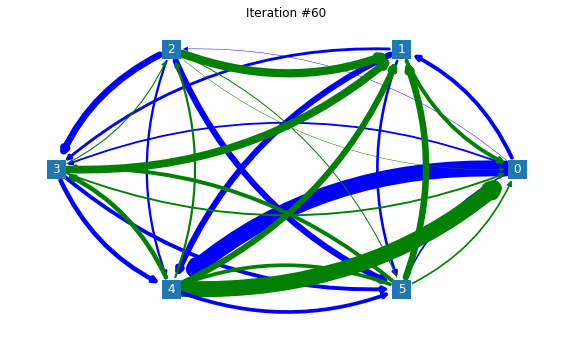

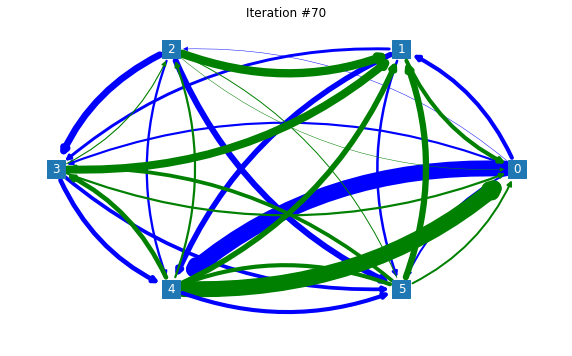

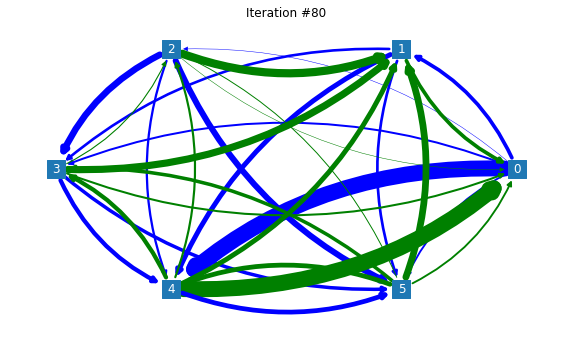

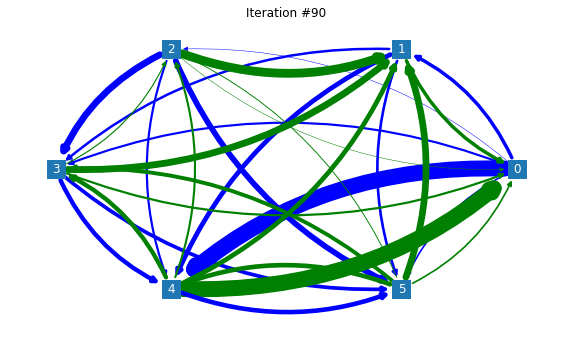

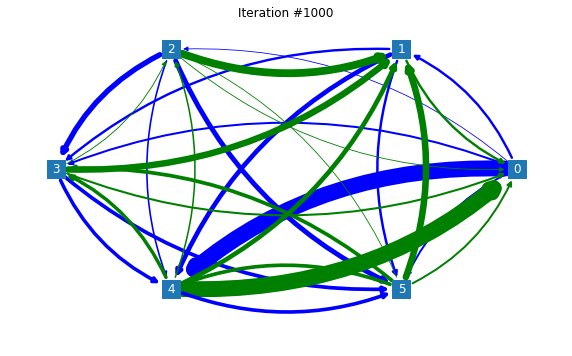

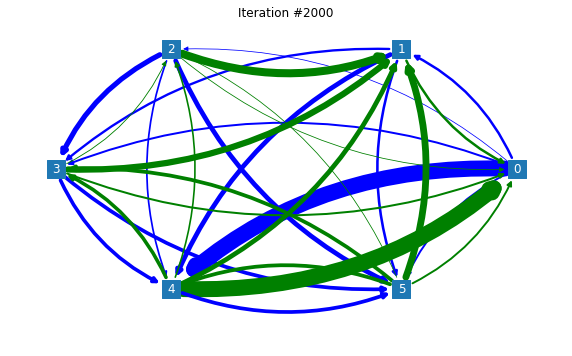

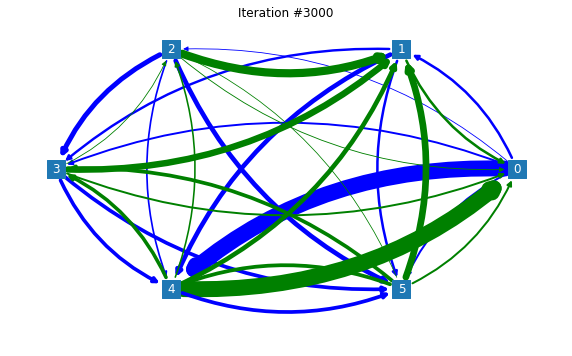

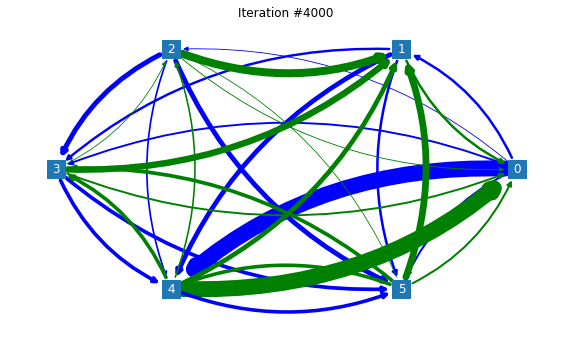

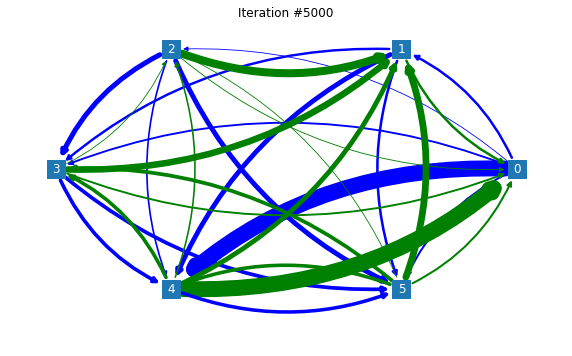

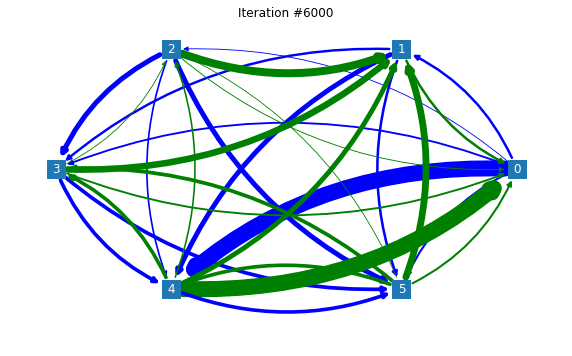

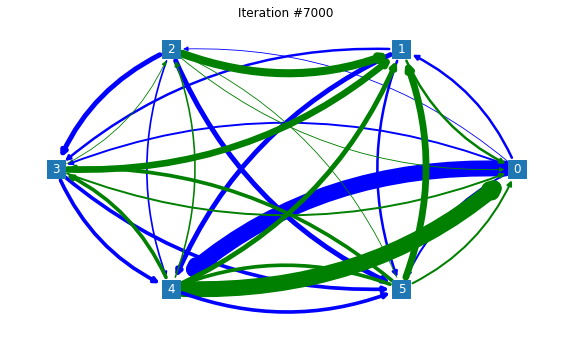

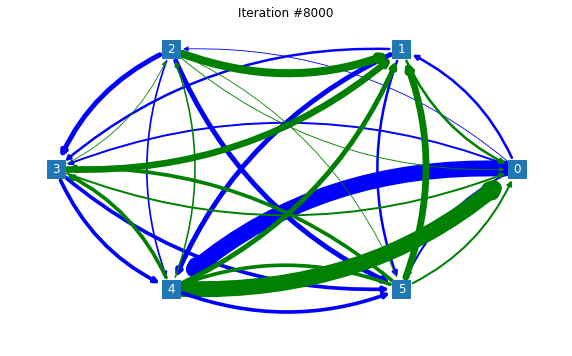

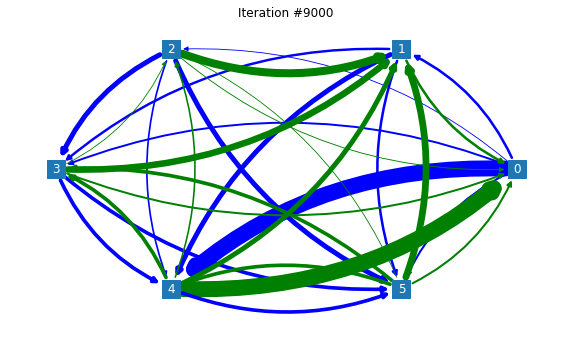

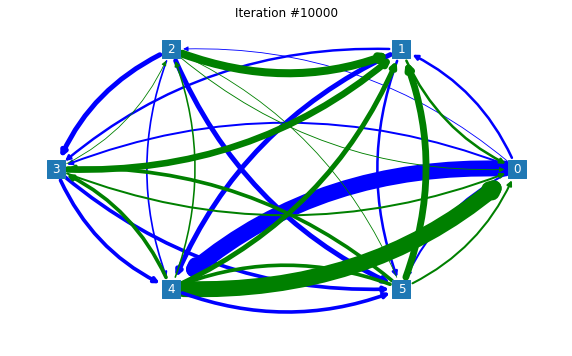

In [2]:
POPULATION = 6
ts = datetime.datetime.now().strftime("%Y-%m-%d %H-%M-%S")
os.makedirs(f"images/{ts}")

agents = [
    TrainableAgent(QLearningSelectionStrategy(POPULATION), TitForTat(), 0, POPULATION),
    Agent(EGreedySelectionStrategy(), AllC()),
    Agent(EGreedySelectionStrategy(), AllD()),
    Agent(EGreedySelectionStrategy(), RandomGameplayStrategy()),
    Agent(EGreedySelectionStrategy(), TitForTat()),
    Agent(RandomSelectionStrategy(), RandomGameplayStrategy()),
]

agents[0].selection_strategy._epsilon = 0.1

sim = OnlineLearningSimulation(agents)
sim.reset()

for i in range(10001):
    sim.play_round()

    if (i < 100 and i % 10 == 0) or (i >= 100 and i % 1000 == 0):
        plot_graph(make_graph(sim.returns), title=f"Iteration #{i}")
        plt.savefig(f"images/{ts}/{i}.png")
        # plt.show()


In [3]:
# Returns by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    returns_by_partner = [sum(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in returns_by_partner],
        "=>",
        sum(returns_by_partner),
    )

   0        1        2        3        4        5       
0: 0        519300   174636   404195   3269400  411789   => 4779320
1: 519300   0        0        501918   1008300  519474   => 2548992
2: 183456   1644500  0        1006516  343720   1007808  => 4186000
3: 408890   1339388  167496   0        756234   745333   => 3417341
4: 3269400  1008300  327195   747704   0        734560   => 6087159
5: 416334   1386684  168048   748563   742710   0        => 3462339


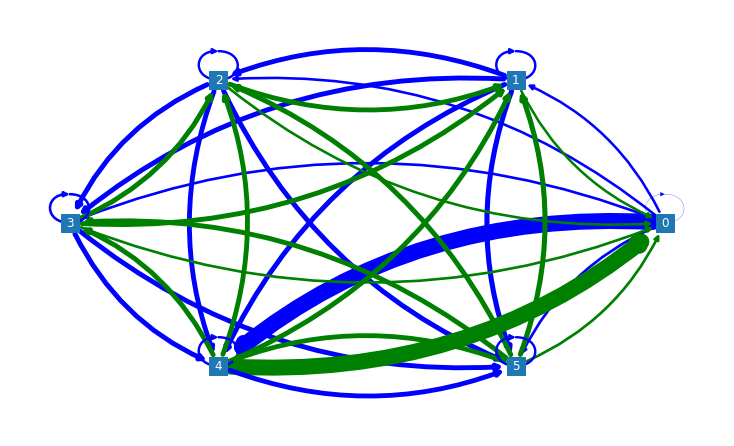

In [4]:
plot_graph(make_frequencies_graph(sim.returns))

In [5]:
# Frequencies by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    frequencies_by_partner = [len(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in frequencies_by_partner],
        "=>",
        sum(frequencies_by_partner),
    )

   0        1        2        3        4        5       
0: 162      1731     1764     1802     10898    1833     => 18190
1: 1731     1680     3289     3348     3361     3466     => 16875
2: 1764     3289     1648     3353     3305     3360     => 16719
3: 1802     3348     3353     1747     3336     3320     => 16906
4: 10898    3361     3305     3336     1699     3274     => 25873
5: 1833     3466     3360     3320     3274     1630     => 16883
